In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from moviepy.editor import VideoFileClip
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [34]:
df=pd.read_csv(r"C:\Users\datapro\Notebooks\Audio\audio_text.csv")

In [35]:
df

File Name                                     Audio Features  \
0      dia0_utt0.mp4  [-297.01422119140625, 153.53903198242188, -49....   
1      dia0_utt1.mp4  [-305.7720031738281, 137.69033813476562, -23.7...   
2     dia0_utt10.mp4  [-296.2013854980469, 170.54347229003906, -59.9...   
3     dia0_utt11.mp4  [-296.4863586425781, 136.7867431640625, -41.92...   
4     dia0_utt12.mp4  [-317.79937744140625, 113.78086853027344, -45....   
...              ...                                                ...   
9983   dia9_utt5.mp4  [-312.27630615234375, 192.239990234375, -57.04...   
9984   dia9_utt6.mp4  [-396.946533203125, 192.0432586669922, -47.444...   
9985   dia9_utt7.mp4  [-357.1268005371094, 165.3511199951172, -44.15...   
9986   dia9_utt8.mp4  [-407.03076171875, 154.23944091796875, -39.508...   
9987   dia9_utt9.mp4  [-392.1946716308594, 153.67132568359375, -19.6...   

      Dialogue_ID  Utterance_ID          Speaker   Emotion Sentiment  Season  \
0               0             0         Chandler   neutral   neutral       8   
1               0             1  The Interviewer   neutral   neutral       8   
2               0            10         Chandler      fear  negative       8   
3               0            11  The Interviewer   neutral   neutral       8   
4               0            12         Chandler  surprise  positive       8   
...           ...           ...              ...       ...       ...     ...   
9983            9             5         Chandler   neutral   neutral       2   
9984            9             6             Jade   neutral   neutral       2   
9985            9             7         Chandler   neutral   neutral       2   
9986            9             8             Jade   neutral   neutral       2   
9987            9             9         Chandler       joy  positive       2   

      Episode     StartTime       EndTime  \
0          21  00:16:16,059  00:16:21,731   
1          21  00:16:21,940  00:16:23,442   
2          21  00:17:02,856  00:17:04,858   
3          21  00:17:05,025  00:17:13,324   
4          21  00:17:13,491  00:17:16,536   
...       ...           ...           ...   
9983        5   0:02:16,261   0:02:16,903   
9984        5   0:02:16,903   0:02:19,185   
9985        5  00:02:19,347  00:02:25,561   
9986        5  00:02:25,770  00:02:28,647   
9987        5  00:02:32,318  00:02:34,528   

                                    Processed_Utterance  Duration  \
0     ['also', 'point', 'person', 'transition', 'sys...     5.672   
1                                      ['hand', 'full']     1.502   
2                                               ['beg']     2.002   
3     ['right', 'definite', 'answer', 'monday', 'thi...     8.299   
4                                            ['really']     3.045   
...                                                 ...       ...   
9983                                           ['back']     0.642   
9984                   ['gon', 'na', 'get', 'together']     2.282   
9985  ['um', 'absolutely', 'uh', 'tomorrow', 'aftern...     6.214   
9986                                   ['great', 'see']     2.877   
9987                       ['phone', 'finally', 'paid']     2.210   

                                Processed_Utterance_Str  
0                   also point person transition system  
1                                             hand full  
2                                                   beg  
3     right definite answer monday think say confide...  
4                                                really  
...                                                 ...  
9983                                               back  
9984                                gon na get together  
9985  um absolutely uh tomorrow afternoon know uh ce...  
9986                                          great see  
9987                                 phone finally paid  

[9988 rows x 14 columns]

In [36]:
import ast

# Convert the 'Audio Features' column to a list of lists
df['Audio Features'] = df['Audio Features'].apply(ast.literal_eval)

# Calculate the length of each list in the 'Audio Features' column
df['Features Length'] = df['Audio Features'].apply(len)


In [37]:
data=df

In [38]:
df=df.drop(["Sentiment","StartTime","EndTime"], axis=1)

In [39]:
df

File Name                                     Audio Features  \
0      dia0_utt0.mp4  [-297.01422119140625, 153.53903198242188, -49....   
1      dia0_utt1.mp4  [-305.7720031738281, 137.69033813476562, -23.7...   
2     dia0_utt10.mp4  [-296.2013854980469, 170.54347229003906, -59.9...   
3     dia0_utt11.mp4  [-296.4863586425781, 136.7867431640625, -41.92...   
4     dia0_utt12.mp4  [-317.79937744140625, 113.78086853027344, -45....   
...              ...                                                ...   
9983   dia9_utt5.mp4  [-312.27630615234375, 192.239990234375, -57.04...   
9984   dia9_utt6.mp4  [-396.946533203125, 192.0432586669922, -47.444...   
9985   dia9_utt7.mp4  [-357.1268005371094, 165.3511199951172, -44.15...   
9986   dia9_utt8.mp4  [-407.03076171875, 154.23944091796875, -39.508...   
9987   dia9_utt9.mp4  [-392.1946716308594, 153.67132568359375, -19.6...   

      Dialogue_ID  Utterance_ID          Speaker   Emotion  Season  Episode  \
0               0             0         Chandler   neutral       8       21   
1               0             1  The Interviewer   neutral       8       21   
2               0            10         Chandler      fear       8       21   
3               0            11  The Interviewer   neutral       8       21   
4               0            12         Chandler  surprise       8       21   
...           ...           ...              ...       ...     ...      ...   
9983            9             5         Chandler   neutral       2        5   
9984            9             6             Jade   neutral       2        5   
9985            9             7         Chandler   neutral       2        5   
9986            9             8             Jade   neutral       2        5   
9987            9             9         Chandler       joy       2        5   

                                    Processed_Utterance  Duration  \
0     ['also', 'point', 'person', 'transition', 'sys...     5.672   
1                                      ['hand', 'full']     1.502   
2                                               ['beg']     2.002   
3     ['right', 'definite', 'answer', 'monday', 'thi...     8.299   
4                                            ['really']     3.045   
...                                                 ...       ...   
9983                                           ['back']     0.642   
9984                   ['gon', 'na', 'get', 'together']     2.282   
9985  ['um', 'absolutely', 'uh', 'tomorrow', 'aftern...     6.214   
9986                                   ['great', 'see']     2.877   
9987                       ['phone', 'finally', 'paid']     2.210   

                                Processed_Utterance_Str  Features Length  
0                   also point person transition system               13  
1                                             hand full               13  
2                                                   beg               13  
3     right definite answer monday think say confide...               13  
4                                                really               13  
...                                                 ...              ...  
9983                                               back               13  
9984                                gon na get together               13  
9985  um absolutely uh tomorrow afternoon know uh ce...               13  
9986                                          great see               13  
9987                                 phone finally paid               13  

[9988 rows x 12 columns]

In [40]:
# Convert 'Audio Features' and 'Emotion' columns to NumPy arrays
audio_features = df['Audio Features'].apply(lambda x: np.array(x, dtype=float)).to_numpy()
emotions = df['Emotion'].to_numpy()
file_paths = df['File Name'].to_numpy()


In [41]:
audio_features

array([array([-2.97014221e+02,  1.53539032e+02, -4.90380211e+01,  5.46977043e+01,
              -5.27428484e+00,  6.43434191e+00, -3.85622478e+00, -1.16022074e+00,
               1.19830534e-01, -8.91124153e+00,  1.22017086e+00,  3.14986753e+00,
              -3.25099730e+00])                                                  ,
       array([-305.77200317,  137.69033813,  -23.75961876,   50.2026825 ,
                -2.27249265,    5.5844698 ,   -0.9529689 ,   -1.49110889,
               -14.78405285,   -3.26989985,    0.4343493 ,   -5.73031712,
                 0.49802315])                                            ,
       array([-296.2013855 ,  170.54347229,  -59.91713715,   15.52770996,
               -11.92023182,   -0.72530061,   -5.87638903,  -11.01383018,
                -5.43226624,  -11.78423595,   -7.7017417 ,    3.51267433,
                -3.61513329])                                            ,
       ...,
       array([-357.12680054,  165.35112   ,  -44.15581894,   11.4

In [42]:
# Convert emotion labels to numerical values
emotion_to_num = {label: idx for idx, label in enumerate(set(emotions))}
numeric_emotions = np.array([emotion_to_num[emotion] for emotion in emotions])


In [43]:
emotion_to_num

{'surprise': 0,
 'joy': 1,
 'neutral': 2,
 'anger': 3,
 'fear': 4,
 'disgust': 5,
 'sadness': 6}

In [44]:
# Determine the maximum length of feature arrays
max_length = max(len(features) for features in audio_features)

# Pad all feature arrays to the maximum length
padded_features = np.array([
    np.pad(features, (0, max_length - len(features)), 'constant') for features in audio_features
])


In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(padded_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=numeric_emotions)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Audio Features')
plt.show()


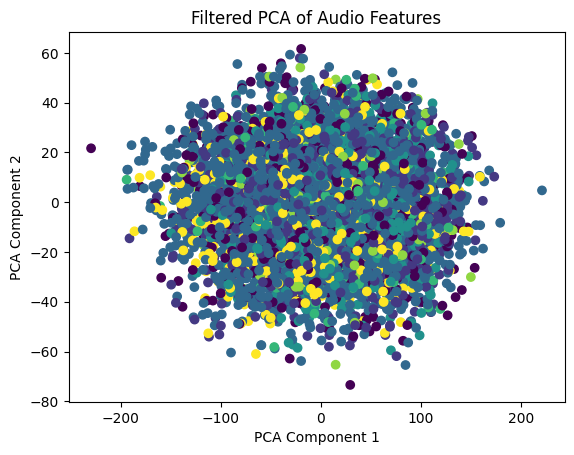

Type of audio_features: <class 'numpy.ndarray'>
Shape of audio_features: (8989, 13)
Shape after stacking: (8989, 13)
Cleaned audio features shape: (8633, 13)
Cleaned emotions shape: (8633,)
Cleaned file paths length: 8633


In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

# Assuming filtered_features, filtered_labels, and file_paths are defined
clf = IsolationForest(contamination=0.1)
outliers = clf.fit_predict(padded_features)

# Filter out the outliers
inliers_mask = outliers != -1
filtered_features = padded_features[inliers_mask]
filtered_labels = numeric_emotions[inliers_mask]
filtered_file_paths = file_paths[inliers_mask]

# Visualize filtered data
pca = PCA(n_components=2)
filtered_reduced_features = pca.fit_transform(filtered_features)
plt.scatter(filtered_reduced_features[:, 0], filtered_reduced_features[:, 1], c=filtered_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Filtered PCA of Audio Features')
plt.show()

# Check the type and shape of the audio_features
print(f"Type of audio_features: {type(filtered_features)}")
print(f"Shape of audio_features: {filtered_features.shape}")

# Ensure all elements in audio_features are numerical arrays
if filtered_features.ndim == 1:
    # If audio_features is 1D, convert to 2D by stacking
    filtered_features = np.vstack(filtered_features)

print(f"Shape after stacking: {filtered_features.shape}")

# Check for and handle any irregular shapes
try:
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(filtered_features, axis=0))
except Exception as e:
    print(f"Error calculating z-scores: {e}")

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Find indices where z-score is greater than threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out outliers
cleaned_audio_features = filtered_features[~outliers]
cleaned_emotions = filtered_labels[~outliers]
cleaned_file_paths = filtered_file_paths[~outliers]

print(f"Cleaned audio features shape: {cleaned_audio_features.shape}")
print(f"Cleaned emotions shape: {cleaned_emotions.shape}")
print(f"Cleaned file paths length: {len(cleaned_file_paths)}")

# Proceed with further processing and model training


In [47]:
cleaned_file_paths

array(['dia0_utt0.mp4', 'dia0_utt1.mp4', 'dia0_utt10.mp4', ...,
       'dia9_utt7.mp4', 'dia9_utt8.mp4', 'dia9_utt9.mp4'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder

# Assuming cleaned_emotions contains the list of emotion labels
label_encoder = LabelEncoder()
encoded_emotions = label_encoder.fit_transform(cleaned_emotions)


In [49]:
encoded_emotions

array([2, 2, 4, ..., 2, 2, 1], dtype=int64)

In [50]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your cleaned data
X_resampled, y_resampled = smote.fit_resample(cleaned_audio_features, encoded_emotions)

print(f"Resampled audio features shape: {X_resampled.shape}")
print(f"Resampled emotions shape: {y_resampled.shape}")


Resampled audio features shape: (28721, 13)
Resampled emotions shape: (28721,)


In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data if necessary (e.g., for Conv1D)
X_resampled = np.expand_dims(X_resampled, axis=-1)  # Add channel dimension if needed

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], X_resampled.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_resampled, y_resampled)
print(f"Model loss: {loss}")
print(f"Model accuracy: {accuracy}")


  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2021 - loss: 2.4910 - val_accuracy: 0.0000e+00 - val_loss: 2.9740
Epoch 2/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2369 - loss: 1.8193 - val_accuracy: 0.0125 - val_loss: 2.9594
Epoch 3/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2563 - loss: 1.7867 - val_accuracy: 0.0240 - val_loss: 3.0222
Epoch 4/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2761 - loss: 1.7620 - val_accuracy: 0.0198 - val_loss: 2.8384
Epoch 5/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2986 - loss: 1.7222 - val_accuracy: 0.0167 - val_loss: 2.9589
Epoch 6/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3297 - loss: 1.6673 - val_accuracy: 0.0616 - val_loss: 2.8718
Epoch 7/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3575 - loss: 1.6246 - val_accuracy: 0.0870 - val_loss: 3.0059
Epoch 8/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3883 - loss: 1.5676 - val_

898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


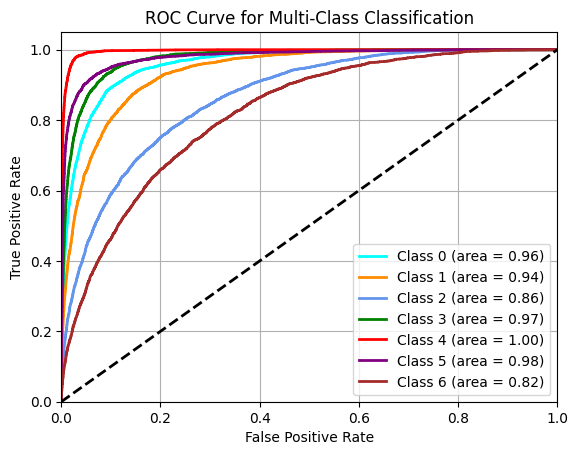

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the labels for ROC curve (one-hot encoding)
y_binarized = label_binarize(y_resampled, classes=range(len(label_encoder.classes_)))

# Predict the probabilities
y_score = model.predict(X_resampled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred_probs = model.predict(X_resampled)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test back to class labels
y_test_labels = y_resampled


898/898 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test_labels and y_pred are your actual and predicted labels
cm = confusion_matrix(y_test_labels, y_pred)


# Generate and print classification report
report = classification_report(y_test_labels, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      4103
           1       0.57      0.79      0.66      4103
           2       0.50      0.56      0.53      4103
           3       0.77      0.82      0.79      4103
           4       0.86      0.98      0.91      4103
           5       0.87      0.82      0.85      4103
           6       0.74      0.09      0.17      4103

    accuracy                           0.70     28721
   macro avg       0.71      0.70      0.66     28721
weighted avg       0.71      0.70      0.66     28721



In [55]:
emotion_to_num.keys()

dict_keys(['surprise', 'joy', 'neutral', 'anger', 'fear', 'disgust', 'sadness'])

In [56]:
cm

array([[3341,  234,  302,   82,   56,   70,   18],
       [ 227, 3239,  390,  106,   63,   55,   23],
       [ 431,  767, 2295,  278,  139,  124,   69],
       [ 141,  222,  257, 3358,   54,   58,   13],
       [  16,   26,   25,   20, 4003,   11,    2],
       [ 171,  223,  142,  109,   65, 3383,   10],
       [ 609, 1012, 1203,  400,  289,  202,  388]], dtype=int64)

In [57]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_to_num.keys(),
            yticklabels=emotion_to_num.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
# Save the model
model.save('cnn_audio_model.h5')


In [59]:
# Save the label encoder classes
np.save('label_encoder_classes.npy', label_encoder.classes_)

In [60]:
emotion_to_num.keys()

dict_keys(['surprise', 'joy', 'neutral', 'anger', 'fear', 'disgust', 'sadness'])

In [ ]:
a

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Assuming df is your original DataFrame containing all the data
# And that you have filtered arrays: cleaned_audio_features, cleaned_emotions, cleaned_file_paths

# Create a boolean mask for the rows that correspond to cleaned data
mask = df['File Name'].isin(cleaned_file_paths)

# Filter the DataFrame using the mask
cleaned_df = df[mask]

# Extract the cleaned 'Processed_Utterance_Str' column
cleaned_processed_utterance_str = cleaned_df['Processed_Utterance_Str']

# Replace NaN values with empty strings
cleaned_processed_utterance_str = cleaned_processed_utterance_str.fillna('')

# Convert to NumPy array
cleaned_processed_utterance_str = cleaned_processed_utterance_str.values

# Vectorize the 'Processed_Utterance_Str' using Count Vectorizer
vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(cleaned_processed_utterance_str).toarray()

# Save the vectorized data as a NumPy array
np.save('vectorized_processed_utterance_str.npy', vectorized_data)

# Optionally, save the cleaned Processed_Utterance_Str to check the saved content
np.save('cleaned_processed_utterance_str.npy', cleaned_processed_utterance_str)

# Display the shape of the vectorized data
print(f"Vectorized data shape: {vectorized_data.shape}")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming cleaned_emotions contains the list of emotion labels
label_encoder = LabelEncoder()
encoded_emotions = label_encoder.fit_transform(cleaned_emotions)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the combined data into training and test sets
X_train_audio, X_test_audio, X_train_text, X_test_text, y_train, y_test = train_test_split(
    cleaned_audio_features, vectorized_data, encoded_emotions, test_size=0.2, random_state=42
)


In [ ]:
pip install optuna


In [ ]:
!pip install optuna

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import numpy as np

# Load your dataset here
# X_train_audio, X_test_audio, X_train_text, X_test_text, y_train, y_test should be defined
# Example:
# X_train_audio = np.load('path/to/X_train_audio.npy')
# X_test_audio = np.load('path/to/X_test_audio.npy')
# X_train_text = np.load('path/to/X_train_text.npy')
# X_test_text = np.load('path/to/X_test_text.npy')
# y_train = np.load('path/to/y_train.npy')
# y_test = np.load('path/to/y_test.npy')

class MultiModalModel(nn.Module):
    def __init__(self, embedding_units, hidden_units, optimizer_choice):
        super(MultiModalModel, self).__init__()
        self.text_embedding = nn.Sequential(
            nn.Linear(vectorized_data.shape[1], embedding_units),
            nn.ReLU(),
            nn.Flatten()
        )
        self.audio_fc = nn.Linear(cleaned_audio_features.shape[1], hidden_units)
        self.fc = nn.Linear(embedding_units + hidden_units, len(np.unique(encoded_emotions)))
        
        if optimizer_choice == 'adam':
            self.optimizer_class = optim.Adam
        elif optimizer_choice == 'sgd':
            self.optimizer_class = optim.SGD
        else:
            raise ValueError(f"Unsupported optimizer: {optimizer_choice}")

    def forward(self, audio, text):
        text_features = self.text_embedding(text)
        audio_features = torch.relu(self.audio_fc(audio))
        combined = torch.cat((text_features, audio_features), dim=1)
        output = self.fc(combined)
        return output

def train_model(trial):
    # Hyperparameters to tune
    embedding_units = trial.suggest_int('embedding_units', 32, 128, step=32)
    hidden_units = trial.suggest_int('hidden_units', 64, 256, step=64)
    optimizer_choice = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
    
    model = MultiModalModel(embedding_units, hidden_units, optimizer_choice)
    criterion = nn.CrossEntropyLoss()
    optimizer = model.optimizer_class(model.parameters(), lr=trial.suggest_loguniform('lr', 1e-5, 1e-1))

    # Training loop
    for epoch in range(10):  # Change as needed
        model.train()
        for batch in range(0, len(X_train_audio), 32):  # Batch size is 32
            audio_batch = torch.tensor(X_train_audio[batch:batch+32], dtype=torch.float32)
            text_batch = torch.tensor(X_train_text[batch:batch+32], dtype=torch.float32)
            labels_batch = torch.tensor(y_train[batch:batch+32], dtype=torch.long)
            
            optimizer.zero_grad()
            outputs = model(audio_batch, text_batch)
            loss = criterion(outputs, labels_batch)
            loss.backward()
            optimizer.step()
        
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in range(0, len(X_test_audio), 32):
            audio_batch = torch.tensor(X_test_audio[batch:batch+32], dtype=torch.float32)
            text_batch = torch.tensor(X_test_text[batch:batch+32], dtype=torch.float32)
            labels_batch = torch.tensor(y_test[batch:batch+32], dtype=torch.long)
            
            outputs = model(audio_batch, text_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += labels_batch.size(0)
            correct += (predicted == labels_batch).sum().item()

    accuracy = correct / total
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(train_model, n_trials=50)  # Number of trials

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")


In [ ]:
best_params = study.best_params
final_model = MultiModalModel(
    embedding_units=best_params['embedding_units'],
    hidden_units=best_params['hidden_units'],
    optimizer_choice=best_params['optimizer']
)
final_optimizer = final_model.optimizer_class(final_model.parameters(), lr=best_params['lr'])
final_criterion = nn.CrossEntropyLoss()

# Train the final model
for epoch in range(200):  # Adjust epochs as needed
    final_model.train()
    for batch in range(0, len(X_train_audio), 32):  # Batch size is 32
        audio_batch = torch.tensor(X_train_audio[batch:batch+32], dtype=torch.float32)
        text_batch = torch.tensor(X_train_text[batch:batch+32], dtype=torch.float32)
        labels_batch = torch.tensor(y_train[batch:batch+32], dtype=torch.long)
        
        final_optimizer.zero_grad()
        outputs = final_model(audio_batch, text_batch)
        loss = final_criterion(outputs, labels_batch)
        loss.backward()
        final_optimizer.step()

    # Validation
    final_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in range(0, len(X_test_audio), 32):
            audio_batch = torch.tensor(X_test_audio[batch:batch+32], dtype=torch.float32)
            text_batch = torch.tensor(X_test_text[batch:batch+32], dtype=torch.float32)
            labels_batch = torch.tensor(y_test[batch:batch+32], dtype=torch.long)
            
            outputs = final_model(audio_batch, text_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += labels_batch.size(0)
            correct += (predicted == labels_batch).sum().item()

    accuracy = correct / total
    print(f"Validation accuracy: {accuracy}")


In [ ]:
# Convert all non-string entries to strings
all_words = ' '.join([str(utt) for utt in df['Processed_Utterance_Str']]).split()

# Find the unique words (vocabulary) and their count
vocab = set(all_words)
vocab_size = len(vocab)

print(f"Vocabulary Size: {vocab_size}")


In [ ]:
# Find the unique emotions and count them
unique_emotions = df['Emotion'].unique()
num_classes = len(unique_emotions)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import torch

# Assuming you have a LabelEncoder instance `label_encoder`
# Get class labels from the label encoder
class_labels = label_encoder.classes_

# Make predictions
final_model.eval()
with torch.no_grad():
    outputs = final_model(test_audio_tensor, test_text_tensor)
    _, predictions = torch.max(outputs, 1)

# Convert predictions and true labels to numpy arrays
predictions = predictions.cpu().numpy()
true_labels = test_labels_tensor.cpu().numpy()

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=np.arange(len(class_labels)))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install perceiver-pytorch
